In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
scores = pd.read_csv('../outputs/demographicsbertscore_results.csv')

In [85]:
scores = scores[scores.task == 'demographics-zeroshot']
scores['source'] = scores.source.fillna('md')
scores.rename(columns={'index': 'metric', '0': 'score'}, inplace=True)

In [86]:
def combined_chars(x):
    if x['strategy'] == 'full':
        return 'full'
    else:
        return f"{int(x['min_chars'])}-{x['max_chars']}"

scores['subset'] = scores.apply(combined_chars, axis=1)
scores = scores[scores.subset != '40-body']

In [87]:
f1 = scores[scores.metric == 'f1']

In [81]:
f1.model_name.unique() 

array(['gpt-3.5-turbo-0613', 'firefunction-v1', 'firefunction-v2',
       'gpt-4o-mini-2024-07-18', 'gpt-4-0125-preview',
       'gpt-3.5-turbo-0125', 'gpt-4o-2024-05-13', 'gpt-3.5-turbo-1106',
       'claude-3.5-sonnet'], dtype=object)

/home/alejandro/miniconda3/lib/python3.9/site-packages/seaborn/_core/plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


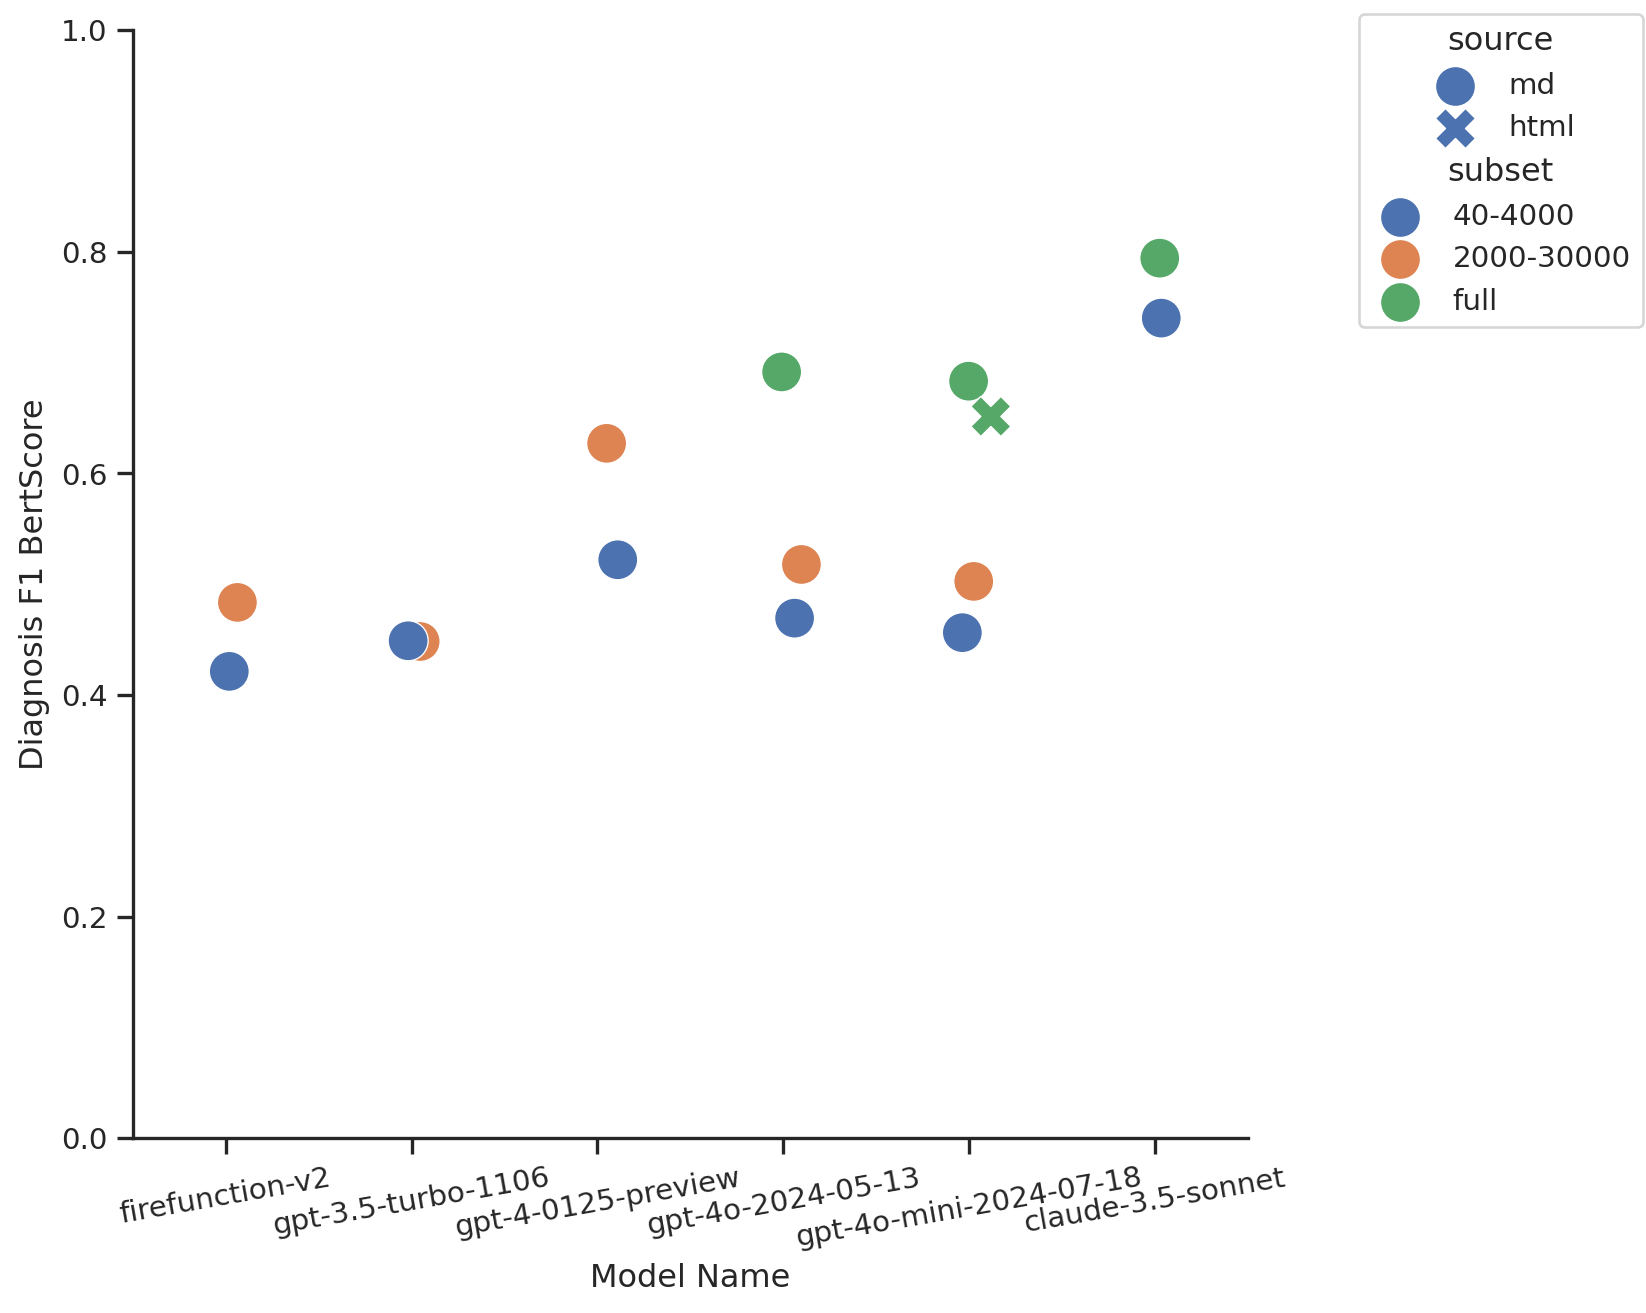

In [96]:
import seaborn.objects as so
p = (
        so.Plot(f1, x='model_name', y='score',
                        marker='source',  color='subset')
        .add(so.Dot(pointsize=15, edgecolor="white"), so.Jitter(.3))
    ).theme(
        {**sns.axes_style("ticks"), 'axes.spines.right': False, 'axes.spines.top': False}
    ).label(
        x='Model Name', y='Diagnosis F1 BertScore', xtick_rotation=90
    ).layout(size=(7, 7)
    ).limit(y=(0, 1)
    ).plot()

# Rotate x-axis labels
p._figure.axes[0].xaxis.set_tick_params(rotation=10)
p._figure.legends[0].set_bbox_to_anchor((1, 0.85))
p

In [89]:
### Remove 40-body